In [1]:
import pandas as pd
import json

targetFile = "/Volumes/时伟SSD512G/扶贫数据汇总.json"

In [2]:
#打开汇总好的json文件，json文件中每一行都是一个字典，将其装载到列表line_dict_list中
line_dict_list = []
with open(targetFile, 'r', encoding="utf-8") as load_targetFile:
    for line in load_targetFile:
        line_dict = json.loads(line)
        line_dict_list.append(line_dict)

In [3]:
#将列表line_dict_list中（每一行是一个字典）的元素转换成DataFrame格式
df = pd.DataFrame.from_dict(line_dict_list)

In [4]:
#df_sub：将df中的数据根据‘tweet’一栏去重之后的新DataFrame
df_sub = df.drop_duplicates(subset=['tweet'])

In [5]:
#查看df_sub的信息
df_sub.head()
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735948 entries, 0 to 872509
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               735948 non-null  int64 
 1   conversation_id  735948 non-null  object
 2   created_at       735948 non-null  object
 3   date             735948 non-null  object
 4   time             735948 non-null  object
 5   timezone         735948 non-null  object
 6   user_id          735948 non-null  int64 
 7   username         735948 non-null  object
 8   name             735948 non-null  object
 9   place            735948 non-null  object
 10  tweet            735948 non-null  object
 11  language         735948 non-null  object
 12  mentions         735948 non-null  object
 13  urls             735948 non-null  object
 14  photos           735948 non-null  object
 15  replies_count    735948 non-null  int64 
 16  retweets_count   735948 non-null  int64 
 17  likes_coun

In [6]:
#删除df_sub中不需要的列，生成新DataFrame——df_sub_2
df_sub_2 = df_sub.drop(labels=['id', 'conversation_id', 'created_at', 'timezone', 'user_id', 
                           'name', 'urls', 'photos', 'cashtags','link', 'retweet', 'quote_url', 
                           'video', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 
                          'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 
                          'trans_src', 'trans_dest'], axis=1) 
# axis=1 表示删除列，['id', 'timezone'] 要删除的列的标签，可一次删除多列 # inplace=True, 直接从内部删除

In [7]:
#查看df_sub_2的信息
df_sub_2.head()
df_sub_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735948 entries, 0 to 872509
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            735948 non-null  object
 1   time            735948 non-null  object
 2   username        735948 non-null  object
 3   place           735948 non-null  object
 4   tweet           735948 non-null  object
 5   language        735948 non-null  object
 6   mentions        735948 non-null  object
 7   replies_count   735948 non-null  int64 
 8   retweets_count  735948 non-null  int64 
 9   likes_count     735948 non-null  int64 
 10  hashtags        735948 non-null  object
dtypes: int64(3), object(8)
memory usage: 67.4+ MB


In [8]:
#将df_sub_2存储到Excel中
df_sub_2.to_excel("/Volumes/时伟SSD512G/扶贫数据-11列.xlsx")

In [9]:
df_sub_2.head()

,date,time,username,place,tweet,language,mentions,replies_count,retweets_count,likes_count,hashtags
0,2021-10-06,07:44:40,donotforget_911,,The Biden administration is warning China over...,en,[],0,0,0,[]
1,2021-10-06,06:57:11,noalgos,,@Stalingrad_Poor @DebraG_Robins driven by Chin...,en,[],0,1,1,[]
2,2021-10-06,06:38:58,openparachute,,@ouuooo @sajidjavid Perhaps your reading is pr...,en,[],0,0,0,[]
3,2021-10-06,06:16:10,ertemnuneg,,"Coordination among ""so-called allies"" against ...",en,"[{'screen_name': 'ipacglobal', 'name': 'inter-...",1,0,0,[]
4,2021-10-06,05:48:25,jasonralston101,,"It’s not about being black, white, Hispanic, J...",en,[],0,0,0,[]


In [11]:
#按照language列筛选出df_sub_2中en的所有数据，生成df_sub_2_en的DataFrame格式
df_sub_2_en = df_sub_2[(df_sub_2['language'] == 'en')]

In [12]:
df_sub_2_en.head() #查看df_sub_2_en数据

,date,time,username,place,tweet,language,mentions,replies_count,retweets_count,likes_count,hashtags
0,2021-10-06,07:44:40,donotforget_911,,The Biden administration is warning China over...,en,[],0,0,0,[]
1,2021-10-06,06:57:11,noalgos,,@Stalingrad_Poor @DebraG_Robins driven by Chin...,en,[],0,1,1,[]
2,2021-10-06,06:38:58,openparachute,,@ouuooo @sajidjavid Perhaps your reading is pr...,en,[],0,0,0,[]
3,2021-10-06,06:16:10,ertemnuneg,,"Coordination among ""so-called allies"" against ...",en,"[{'screen_name': 'ipacglobal', 'name': 'inter-...",1,0,0,[]
4,2021-10-06,05:48:25,jasonralston101,,"It’s not about being black, white, Hispanic, J...",en,[],0,0,0,[]


In [13]:
#将df_sub_2_en存储到Excel中
df_sub_2_en.to_excel("/Volumes/时伟SSD512G/扶贫数据-11列-英文推文筛选.xlsx")

In [15]:
#sort_values() 中设置单个列的列名称，可以根据单个列进行排序，通过设置参数 ascending 可以设置升序或降序排列，默认升序True，降序是False
df_sub_2_en_datesort = df_sub_2_en.sort_values('date', ascending = True)

df_sub_2_en_datesort.head()

,date,time,username,place,tweet,language,mentions,replies_count,retweets_count,likes_count,hashtags
650558,2007-01-26,20:21:14,philcampbell,,Really was considering going to the chang thai...,en,[],0,0,0,[]
650557,2007-03-26,10:05:21,aardling,,Electric guitar music? Rhino cavalry? Chinese ...,en,[],0,0,0,[]
275563,2007-04-01,07:09:58,maushopgirl,,watching the evening news - glutten from china...,en,[],0,0,0,[]
749619,2007-04-09,12:04:13,cdt,,China cautiously enlists NGO help in poverty f...,en,[],0,0,0,[]
650556,2007-04-13,07:56:47,boogenstein,,"@andrewbarnett We have an average Thai, a poor...",en,[],0,0,0,[]


In [30]:
#统计df_sub_2_en_datesort这个dataframe中date列中的各个日期发帖数量 #series_datacount为series格式
series_datacount = df_sub_2_en_datesort['date'].value_counts(ascending=True)
print(series_datacount)

2007-01-26       1
2008-04-30       1
2008-05-04       1
2008-12-21       1
2008-12-20       1
              ... 
2015-09-27    1275
2020-06-18    1284
2020-06-20    1291
2016-06-21    1321
2020-03-19    1576
Name: date, Length: 5042, dtype: int64


In [39]:
#将series格式的series_datacount转换成dataframe格式的df_datacount
df_datacount = series_datacount.to_frame(name='count')
df_datacount = df_datacount.reset_index().rename(columns={'index':'date'}) #更改索引列名
df_datacount = df_datacount.sort_values('date', ascending = True) #将date列按升序排序
df_datacount.head()

,date,count
0,2007-01-26,1
147,2007-03-26,1
140,2007-04-01,1
169,2007-04-09,1
163,2007-04-13,1


In [40]:
#调用matplotlib对日期与数量进行绘图 教程https://www.runoob.com/matplotlib/matplotlib-tutorial.html
import matplotlib.pyplot as plt

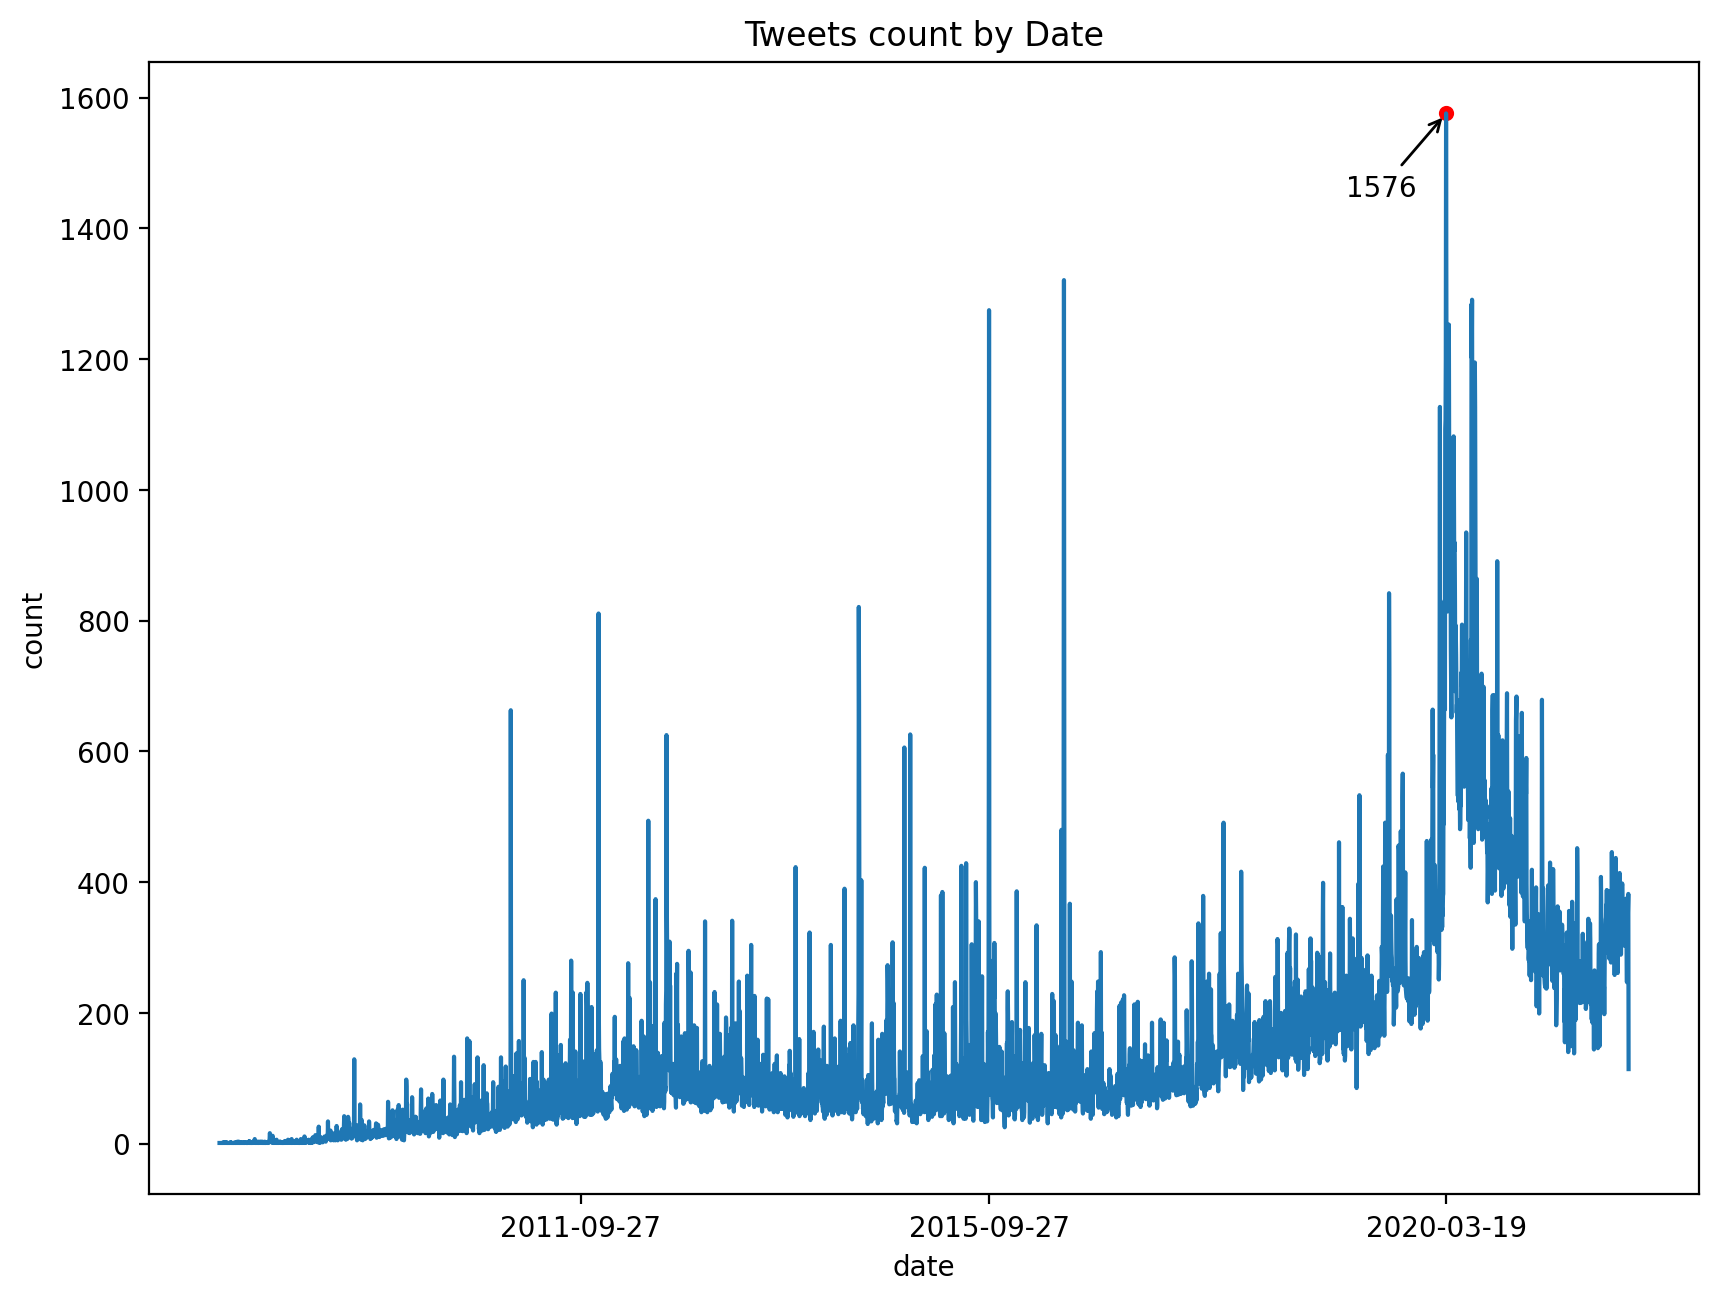

In [58]:
#对折线进行修饰
#color设置为红色，alpha设置为透明度，linestyle表示线的样式，linewidth表示线的宽度
#color还可以设置为16进制的色值，可在网上查看各种颜色对应的色值
#plt.plot(x,y,color='red',alpha=0.5,linestyle='--',linewidth=1)

plt.figure(figsize = (10, 7.5), dpi = 200) #调整画布大小，这一步要放到最开始

plt.plot(df_datacount['date'], df_datacount['count']) #格式为plt.plot(x,y) #plot函数需要两个参数，一个是x一个是y
plt.xlabel('date') #设置x坐标轴的名称
plt.ylabel('count') #设置y坐标
#挑选X轴的标签进行显示，两个方括号内的内容前后对应
plt.xticks(["2011-09-27", "2015-09-27", "2020-03-19"], ["2011-09-27", "2015-09-27", "2020-03-19"])
plt.title('Tweets count by Date') #添加标题

#对某一个点进行注释，并将该点标记为红色 https://www.cnblogs.com/dqi1999/articles/14004235.html
plt.annotate('1576', ("2020-03-19", 1576), xycoords = ('data'), xytext=(-36, -30), 
             textcoords='offset points', arrowprops=dict(arrowstyle='->'))
#plt.scatter()函数解析 https://blog.csdn.net/qq_36387683/article/details/101378036
plt.scatter("2020-03-19", 1576, color = 'r', marker = 'o', s = 20)

#展示图片
plt.show()
#plt.savefig('python初阶\案例图片.png')